# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
meta_study_data = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
meta_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice=len(mouse_metadata)
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice_id = meta_study_data.set_index(["Mouse ID"])["Timepoint"]
#mice_id_time.head(50)
duplicate_entries = meta_study_data[meta_study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_entries['Mouse ID'].unique()
duplicate_mouse_ids
#for mouse_id in duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = []

for mouse_id in duplicate_mouse_ids:
    mice_data = meta_study_data[meta_study_data['Mouse ID'] == mouse_id]
    duplicate_mouse_data.append(mice_data)

    #print(f"Data for Mouse ID {mouse_id}:")
    #print(duplicate_mouse_data)
duplicate_display = pd.concat(duplicate_mouse_data)
duplicate_display

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = meta_study_data[~meta_study_data['Mouse ID'].isin(duplicate_mouse_ids)]
print(type(clean_mouse_data))
clean_mouse_data


<class 'pandas.core.frame.DataFrame'>


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_mouse_data['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = clean_mouse_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
variance = drug_regimen['Tumor Volume (mm3)'].var()
std_dev = drug_regimen['Tumor Volume (mm3)'].std()
sem = drug_regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume SEM': sem
})
drug_regimen_summary = drug_regimen_summary.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_stats_agg = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Tests')

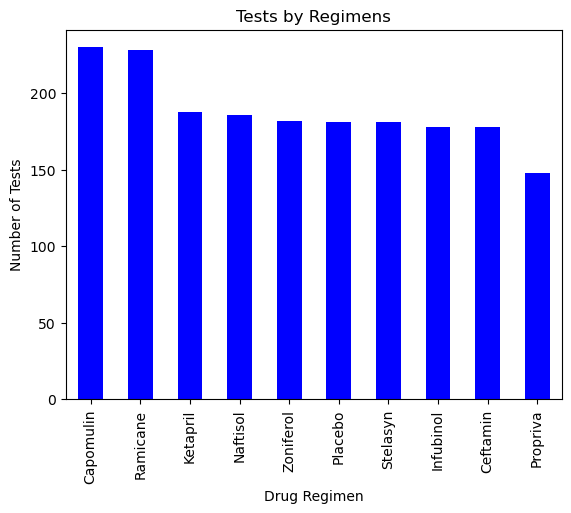

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimens = clean_mouse_data['Drug Regimen'].value_counts()
regimens.plot(kind='bar', color='blue')

plt.title('Tests by Regimens')
plt.ylabel('Number of Tests')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

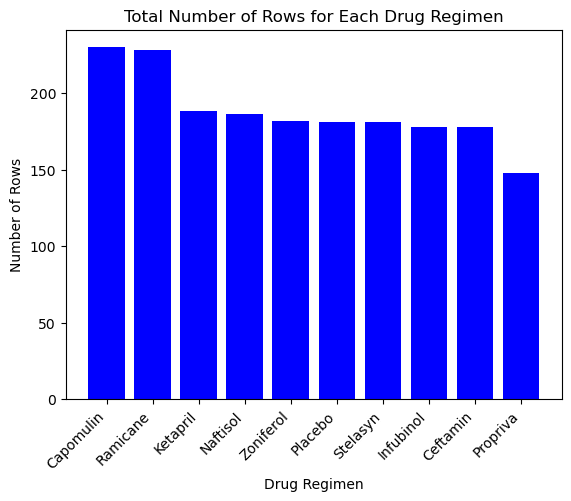

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens2 = clean_mouse_data['Drug Regimen'].value_counts()

plt.bar(regimens2.index, regimens2, color = 'blue')

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=45, ha='right')


Text(0, 0.5, 'Sex')

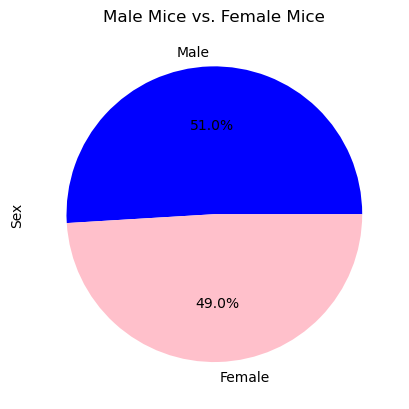

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution1 = clean_mouse_data['Sex'].value_counts()

gender_distribution1.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'])

plt.title('Male Mice vs. Female Mice')

plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

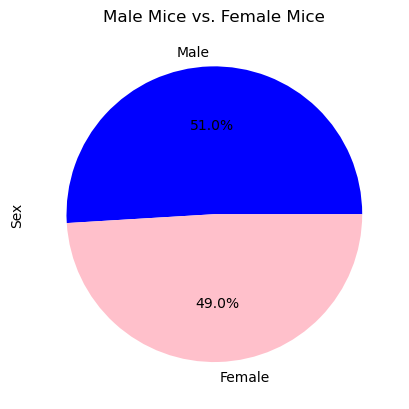

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution2 = clean_mouse_data['Sex'].value_counts()

plt.pie(gender_distribution2, labels=gender_distribution2.index, autopct='%1.1f%%', colors=['blue', 'pink'])

plt.title('Male Mice vs. Female Mice')

plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_regimens = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(drug_regimens)]


# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = filtered_regimens.groupby('Mouse ID')['Timepoint'].max()

final_timepoint_df = pd.DataFrame(final_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_merge = pd.merge(final_timepoint_df, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')

print(final_timepoint_merge[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_timepoint_merge[final_timepoint_merge['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Add subset (tumor volumes) to the list for plotting purposes
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Identifying outliers
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Potential outliers for {regimen} regimen: {outliers}")



Potential outliers for Infubinol regimen: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin regimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane regimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Capomulin regimen: Series([], Name: Tumor Volume (mm3), dtype: float64)


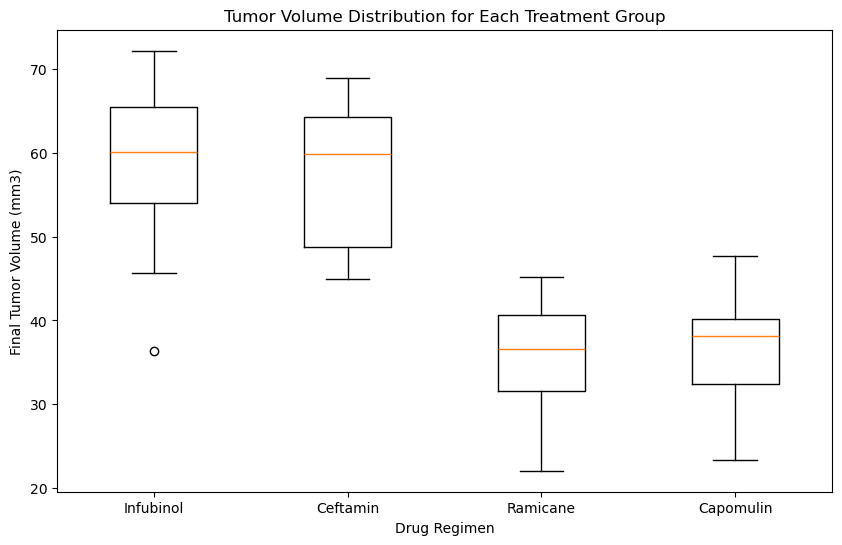

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=regimens)

plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

    Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
371     l509    Capomulin  Male          17          21          0   
372     l509    Capomulin  Male          17          21          5   
373     l509    Capomulin  Male          17          21         10   
374     l509    Capomulin  Male          17          21         15   
375     l509    Capomulin  Male          17          21         20   
376     l509    Capomulin  Male          17          21         25   
377     l509    Capomulin  Male          17          21         30   
378     l509    Capomulin  Male          17          21         35   
379     l509    Capomulin  Male          17          21         40   
380     l509    Capomulin  Male          17          21         45   

     Tumor Volume (mm3)  Metastatic Sites  
371           45.000000                 0  
372           45.851193                 0  
373           46.759074                 0  
374           47.488599                 1  
375      

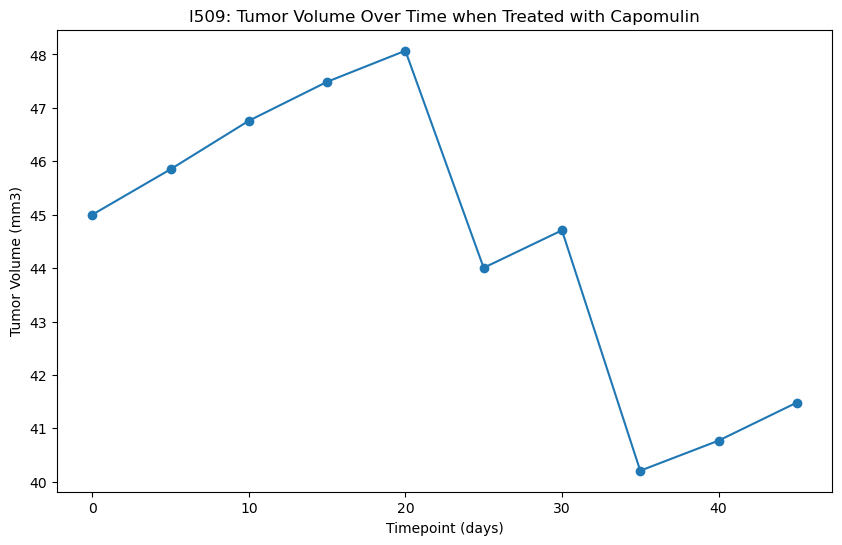

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_mouse_data[(clean_mouse_data['Mouse ID']=='l509') & (clean_mouse_data['Drug Regimen'] == 'Capomulin')]
print(mouse_l509)

plt.figure(figsize = (10,6))
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], marker='o', label ='Tumor Volume')

plt.title('l509: Tumor Volume Over Time when Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

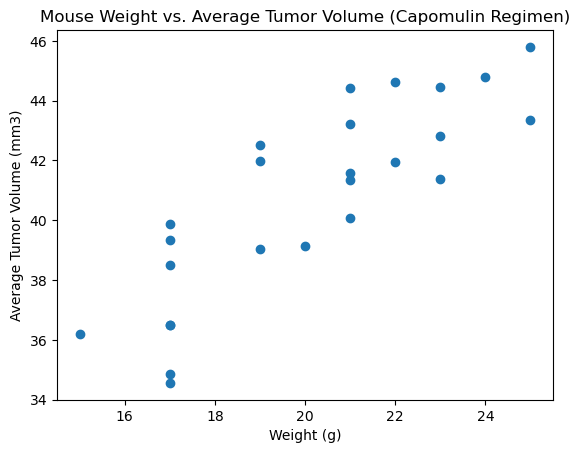

In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen']== 'Capomulin']
capomulin_average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

meta_data_with_capomulin = pd.merge(capomulin_average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

plt.scatter(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show


## Correlation and Regression

PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712605e-07)


<function matplotlib.pyplot.show(close=None, block=None)>

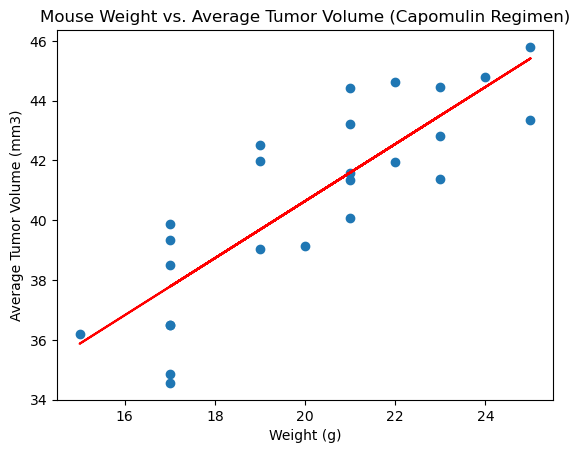

In [62]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen']== 'Capomulin']
capomulin_average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

meta_data_with_capomulin = pd.merge(capomulin_average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

plt.scatter(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])
print(correlation)

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])

regression_values = meta_data_with_capomulin['Weight (g)']*slope+intercept

plt.plot(meta_data_with_capomulin['Weight (g)'], regression_values, "r-")
plt.show